In [ ]:
#Prédire les revenus futurs en fonction des données historiques pour une planification financière optimisée et des décisions stratégiques éclairées.

C:\Users\malek chouaya\AppData\Local\Temp\ipykernel_13956\2509166615.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


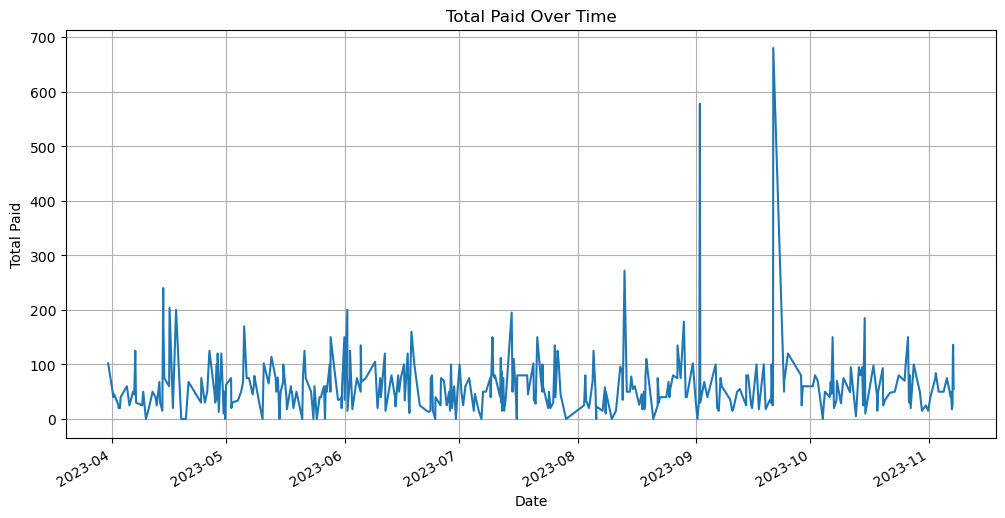

In [1]:
# utiliser un modèle de séries temporelles pour prédire ses revenus mensuels en fonction des données historiques des ventes.
#En analysant les variations saisonnières, les tendances de croissance et 
#d'autres facteurs influençant les ventes, l'entreprise peut ajuster ses stratégies de marketing,
#de gestion des stocks et de tarification pour maximiser ses revenus futurs.







In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [5]:
import psycopg2
import pandas as pd

# Se connecter à la base de données PostgreSQL
conn = psycopg2.connect(dbname='dw', user='postgres', password='0000', host='localhost', port='5432')

# Requête SQL pour récupérer le total_paid, le mois, le jour et l'année en joignant les tables DimDateX et DimOrdersX222
query = """
SELECT o."total_paid",
       EXTRACT(day FROM d."Date") AS day,
       EXTRACT(month FROM d."Date") AS month,
       EXTRACT(year FROM d."Date") AS year
FROM public."DimOrdersX222" o
JOIN public."DimDateX" d ON o."DateFK" = d."DateFK";
"""

# Charger les données dans un DataFrame
df = pd.read_sql_query(query, conn)

# Afficher les premières lignes du DataFrame
print(df.head())


OperationalError: connection to server at "localhost" (127.0.0.1), port 5432 failed: Connection refused
	Is the server running on that host and accepting TCP/IP connections?


In [23]:
import psycopg2
import pandas as pd

# Se connecter à la base de données PostgreSQL
conn = psycopg2.connect(dbname='dw', user='postgres', password='0000', host='localhost', port='5432')

# Requête SQL pour récupérer le total_paid et la date au format "YYYY-MM-DD"
query = """
SELECT o."total_paid",
       CONCAT(EXTRACT(year FROM d."Date"), '-', EXTRACT(month FROM d."Date"), '-', EXTRACT(day FROM d."Date")) AS date
FROM public."DimOrdersX222" o
JOIN public."DimDateX" d ON o."DateFK" = d."DateFK";
"""

# Charger les données dans un DataFrame
df = pd.read_sql_query(query, conn)

# Afficher les premières lignes du DataFrame
print(df.head())


   total_paid       date
0        68.0  2023-11-7
1        68.0   2023-9-3
2        23.0   2023-8-5
3        15.0  2023-6-23
4        68.0  2023-5-15


In [13]:
import psycopg2
import pandas as pd

# Connexion à la base de données
conn = psycopg2.connect(dbname='dw', user='postgres', password='0000', host='localhost', port='5432')

# Requête SQL pour extraire les données des tables
query = """
SELECT o."total_paid", d."Day", d."Month", d."Year"
FROM public."DimOrdersX222" o
JOIN public."DimDateX" d ON o."DateFK" = d."DateFK";
"""

# Charger les données dans un DataFrame
df = pd.read_sql_query(query, conn)

# Concaténer les colonnes Day, Month et Year pour créer la colonne Date
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Afficher les premières lignes du DataFrame
print(df.head())


   total_paid Day Month  Year       Date
0        68.0  07    11  2023 2023-11-07
1        68.0  03    09  2023 2023-09-03
2        23.0  05    08  2023 2023-08-05
3        15.0  23    06  2023 2023-06-23
4        68.0  15    05  2023 2023-05-15


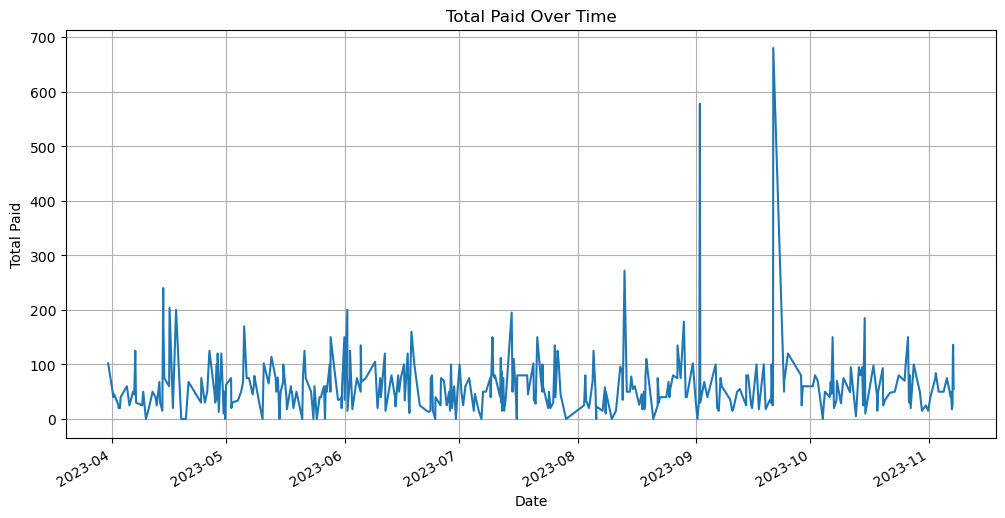

In [28]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# Connecter à la base de données PostgreSQL
conn = psycopg2.connect(dbname='dw', user='postgres', password='0000', host='localhost', port='5432')

# Requête SQL pour récupérer les données
query = """
SELECT o.total_paid, d."Date"
FROM public."DimOrdersX222" o
JOIN public."DimDateX" d ON o."DateFK" = d."DateFK";
"""

# Charger les données dans un DataFrame
df = pd.read_sql_query(query, conn)

# Convertir la colonne 'Date' en datetime et la définir comme index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Créer la série temporelle
time_series = df['total_paid']

# Tracer la série temporelle
plt.figure(figsize=(12, 6))
time_series.plot()
plt.xlabel('Date')
plt.ylabel('Total Paid')
plt.title('Total Paid Over Time')
plt.grid(True)
plt.show()



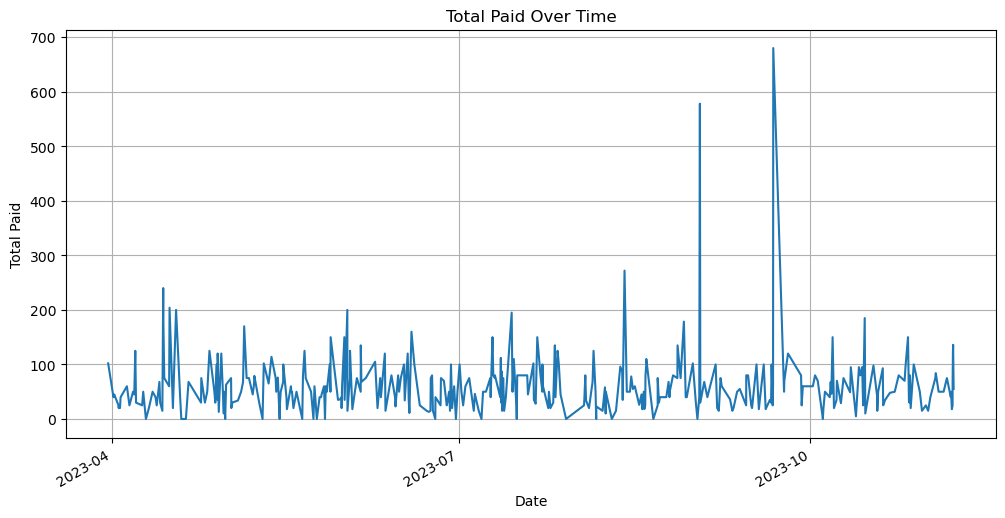

In [31]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the PostgreSQL database
conn = psycopg2.connect(dbname='dw', user='postgres', password='0000', host='localhost', port='5432')

# SQL query to retrieve the data
query = """
SELECT o.total_paid, d."Date"
FROM public."DimOrdersX222" o
JOIN public."DimDateX" d ON o."DateFK" = d."DateFK";
"""

# Load the data into a DataFrame
df = pd.read_sql_query(query, conn)

# Convert the 'Date' column to datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Create the time series
time_series = df['total_paid']

# Plot the time series
plt.figure(figsize=(12, 6))
time_series.plot()
plt.xlabel('Date')
plt.ylabel('Total Paid')
plt.title('Total Paid Over Time')

# Set the frequency of x-axis labels to every 3 months
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=3))

plt.grid(True)
plt.show()


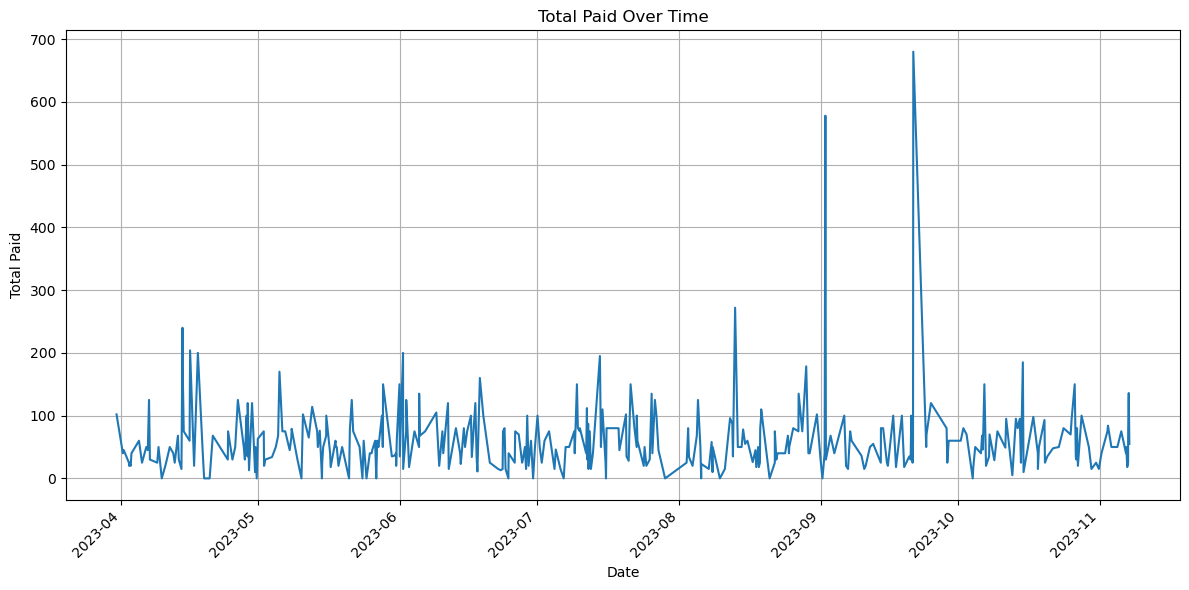

In [32]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the PostgreSQL database
conn = psycopg2.connect(dbname='dw', user='postgres', password='0000', host='localhost', port='5432')

# SQL query to retrieve the data
query = """
SELECT o.total_paid, d."Date"
FROM public."DimOrdersX222" o
JOIN public."DimDateX" d ON o."DateFK" = d."DateFK";
"""

# Load the data into a DataFrame
df = pd.read_sql_query(query, conn)

# Convert the 'Date' column to datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Create the time series
time_series = df['total_paid']

# Plot the time series
plt.figure(figsize=(12, 6))
time_series.plot()
plt.xlabel('Date')
plt.ylabel('Total Paid')
plt.title('Total Paid Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


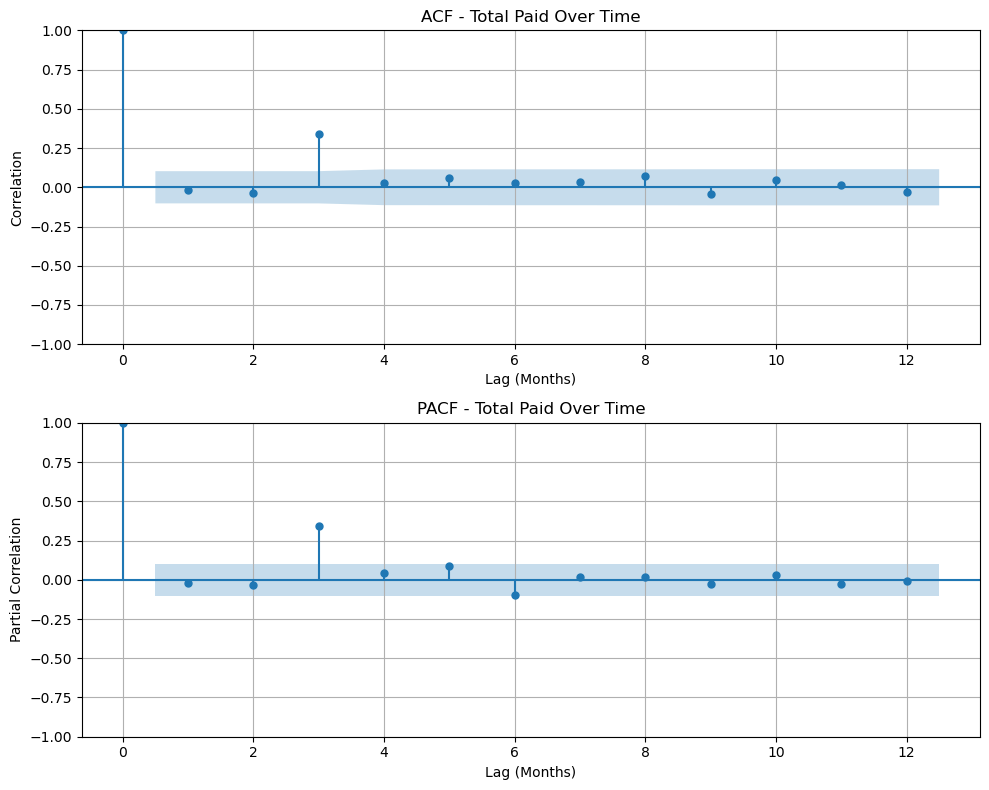

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot ACF
plot_acf(time_series, lags=12, zero=True, ax=ax1)  # Assuming 12 months for yearly data
ax1.set_title('ACF - Total Paid Over Time')
ax1.set_xlabel('Lag (Months)')
ax1.set_ylabel('Correlation')
ax1.grid(True)

# Plot PACF
plot_pacf(time_series, lags=12, zero=True, ax=ax2)  # Assuming 12 months for yearly data
ax2.set_title('PACF - Total Paid Over Time')
ax2.set_xlabel('Lag (Months)')
ax2.set_ylabel('Partial Correlation')
ax2.grid(True)

# Adjust subplots
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 1200x600 with 0 Axes>

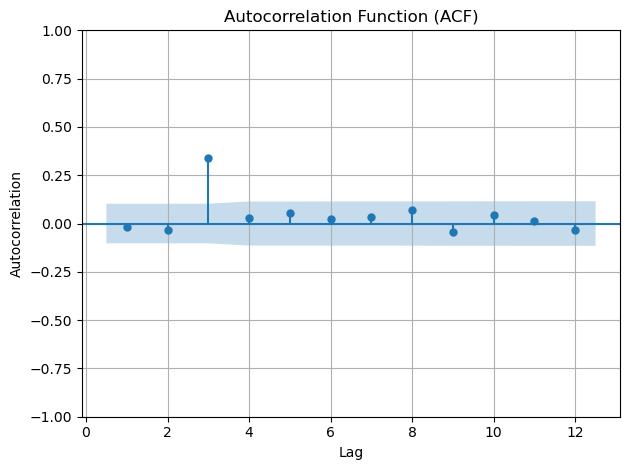

In [36]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Plot the autocorrelation function
plt.figure(figsize=(12, 6))
plot_acf(df['total_paid'], lags=12, zero=False)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [37]:
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

# Perform the augmented Dickey-Fuller test
result = adfuller(df['total_paid'])

# Format the results into a table
table = [
    ['Test Statistic', result[0]],
    ['P-value', result[1]],
    ['Conclusion', 'The series is stationary' if result[1] < 0.05 else 'The series is non-stationary']
]

# Display the results as a table
print(tabulate(table, headers=['Metric', 'Value'], tablefmt='github'))


| Metric         | Value                    |
|----------------|--------------------------|
| Test Statistic | -6.250250864273596       |
| P-value        | 4.472220108111898e-08    |
| Conclusion     | The series is stationary |


In [61]:
# Séparer les données en ensemble d'entraînement et ensemble de test
train_data = df['total_paid'][:-15]  # Adjust 'total_paid' to the column name in your dataset
test_data = df['total_paid'][-15:]   # Adjust 'total_paid' to the column name in your dataset


In [62]:
p=2
d=1
q=1,3

In [63]:
# Créer un modèle ARIMA(2,1,1)
model = ARIMA(train_data, order=(2,1,1))  # Adjust 'train_data' to your dataset column name
                                          # and order as needed

# Ajuster le modèle
model_fit = model.fit()

# Afficher le résumé du modèle
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:             total_paid   No. Observations:                  350
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1923.537
Date:                Fri, 26 Apr 2024   AIC                           3855.075
Time:                        23:00:31   BIC                           3870.495
Sample:                    01-01-1970   HQIC                          3861.213
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3924      0.035    -11.218      0.000      -0.461      -0.324
ar.L2         -0.3605      0.027    -13.453      0.000      -0.413      -0.308
ma.L1         -0.5848      0.039    -15.057      0.0

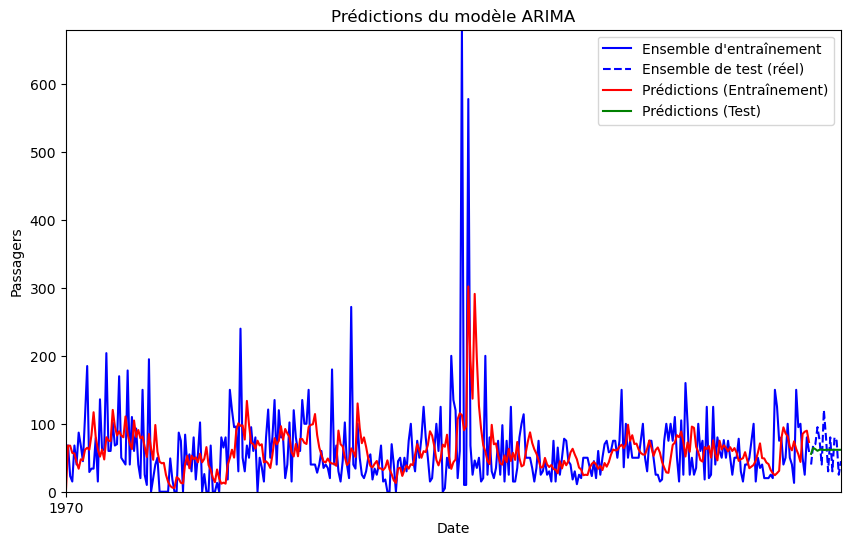

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prédictions sur l'ensemble d'entraînement
train_predictions = model_fit.predict(start=train_data.index[0], end=train_data.index[-1])  # Replace 'train_data' with your dataset's index

# Prédictions sur l'ensemble de test
test_predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])  # Replace 'test_data' with your dataset's index

# Tracer les prédictions et les données réelles avec les courbes collées
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.values, label='Ensemble d\'entraînement', color='blue')  # Replace 'train_data' with your dataset's index and values
plt.plot(test_data.index, test_data.values, label='Ensemble de test (réel)', color='blue', linestyle='--')  # Replace 'test_data' with your dataset's index and values
plt.plot(train_predictions.index, train_predictions, label='Prédictions (Entraînement)', color='red')
plt.plot(test_predictions.index, test_predictions, label='Prédictions (Test)', color='green')

# Définir les limites des axes x et y pour une continuité visuelle
plt.xlim(train_data.index[0], test_data.index[-1])
plt.ylim(min(train_data.min(), test_data.min()), max(train_data.max(), test_data.max()))  # Adjust according to your dataset

plt.xlabel('Date')
plt.ylabel('Passagers')  # Adjust ylabel as per your dataset
plt.title('Prédictions du modèle ARIMA')  # Adjust title if needed
plt.legend()
plt.show()


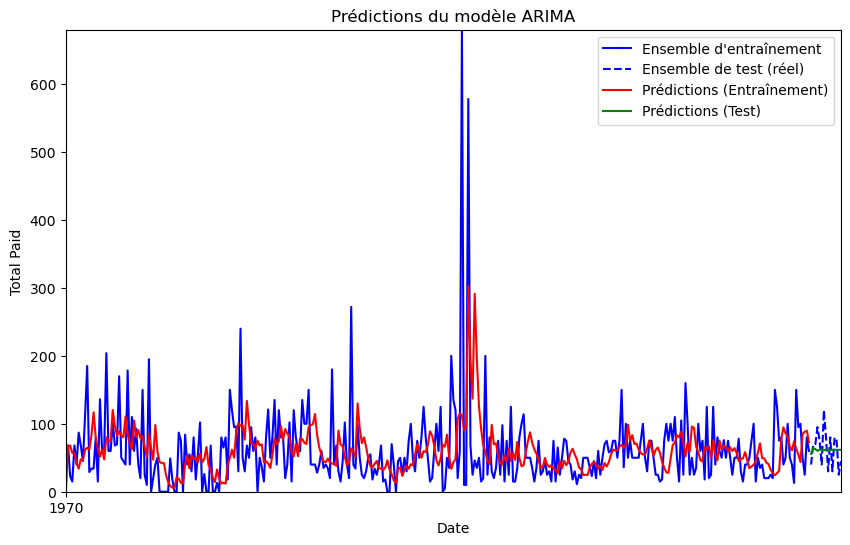

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prédictions sur l'ensemble d'entraînement
train_predictions = model_fit.predict(start=train_data.index[0], end=train_data.index[-1])  # Replace 'train_data' with your dataset's index

# Prédictions sur l'ensemble de test
test_predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])  # Replace 'test_data' with your dataset's index

# Tracer les prédictions et les données réelles avec les courbes collées
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.values, label='Ensemble d\'entraînement', color='blue')  # Replace 'train_data' with your dataset's index and values
plt.plot(test_data.index, test_data.values, label='Ensemble de test (réel)', color='blue', linestyle='--')  # Replace 'test_data' with your dataset's index and values
plt.plot(train_predictions.index, train_predictions, label='Prédictions (Entraînement)', color='red')
plt.plot(test_predictions.index, test_predictions, label='Prédictions (Test)', color='green')

# Définir les limites des axes x et y pour une continuité visuelle
plt.xlim(train_data.index[0], test_data.index[-1])
plt.ylim(min(train_data.min(), test_data.min()), max(train_data.max(), test_data.max()))  # Adjust according to your dataset

plt.xlabel('Date')
plt.ylabel('Total Paid')  # Adjust ylabel as per your dataset
plt.title('Prédictions du modèle ARIMA')  # Adjust title if needed
plt.legend()
plt.show()


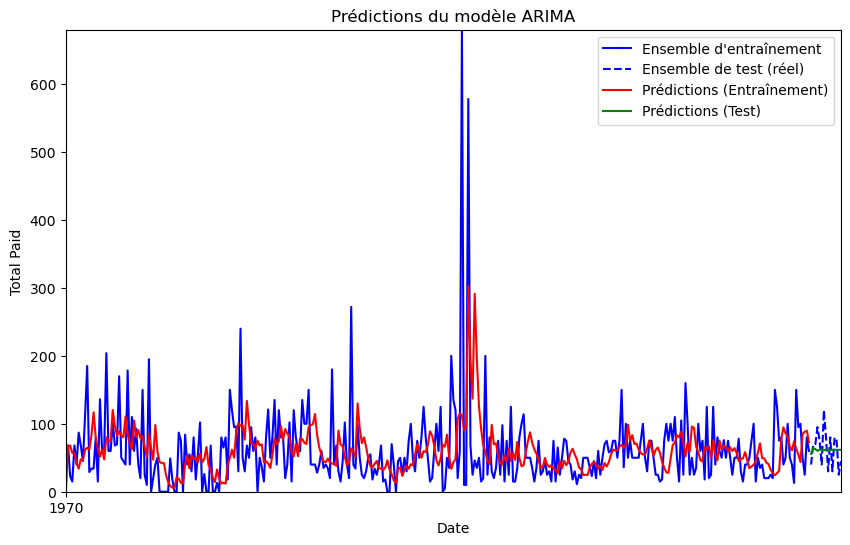

In [66]:
# Convert index to datetime format
train_data.index = pd.to_datetime(train_data.index)
test_data.index = pd.to_datetime(test_data.index)

# Prédictions sur l'ensemble d'entraînement
train_predictions = model_fit.predict(start=train_data.index[0], end=train_data.index[-1])  

# Prédictions sur l'ensemble de test
test_predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])  

# Tracer les prédictions et les données réelles avec les courbes collées
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.values, label='Ensemble d\'entraînement', color='blue')  
plt.plot(test_data.index, test_data.values, label='Ensemble de test (réel)', color='blue', linestyle='--')  
plt.plot(train_predictions.index, train_predictions, label='Prédictions (Entraînement)', color='red')
plt.plot(test_predictions.index, test_predictions, label='Prédictions (Test)', color='green')

# Définir les limites des axes x et y pour une continuité visuelle
plt.xlim(train_data.index[0], test_data.index[-1])
plt.ylim(min(train_data.min(), test_data.min()), max(train_data.max(), test_data.max()))  

plt.xlabel('Date')
plt.ylabel('Total Paid')  
plt.title('Prédictions du modèle ARIMA')  
plt.legend()
plt.show()


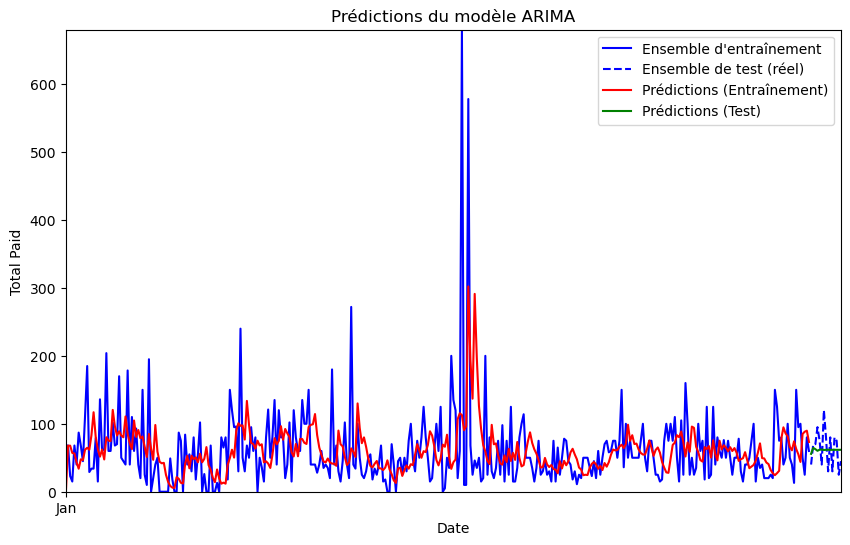

In [67]:
# Convert index to datetime format
train_data.index = pd.to_datetime(train_data.index)
test_data.index = pd.to_datetime(test_data.index)

# Prédictions sur l'ensemble d'entraînement
train_predictions = model_fit.predict(start=train_data.index[0], end=train_data.index[-1])  

# Prédictions sur l'ensemble de test
test_predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])  

# Tracer les prédictions et les données réelles avec les courbes collées
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.values, label='Ensemble d\'entraînement', color='blue')  
plt.plot(test_data.index, test_data.values, label='Ensemble de test (réel)', color='blue', linestyle='--')  
plt.plot(train_predictions.index, train_predictions, label='Prédictions (Entraînement)', color='red')
plt.plot(test_predictions.index, test_predictions, label='Prédictions (Test)', color='green')

# Définir les limites des axes x et y pour une continuité visuelle
plt.xlim(train_data.index[0], test_data.index[-1])
plt.ylim(min(train_data.min(), test_data.min()), max(train_data.max(), test_data.max()))  

# Formatter les étiquettes de l'axe des x pour afficher uniquement les mois
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.xlabel('Date')
plt.ylabel('Total Paid')  
plt.title('Prédictions du modèle ARIMA')  
plt.legend()
plt.show()


In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate performance metrics for the training set
train_mae = mean_absolute_error(train_data, train_predictions)
train_mse = mean_squared_error(train_data, train_predictions)
train_rmse = mean_squared_error(train_data, train_predictions, squared=False)
train_r2 = r2_score(train_data, train_predictions)

# Calculate performance metrics for the test set
test_mae = mean_absolute_error(test_data, test_predictions)
test_mse = mean_squared_error(test_data, test_predictions)
test_rmse = mean_squared_error(test_data, test_predictions, squared=False)
test_r2 = r2_score(test_data, test_predictions)

# Create a DataFrame to display the performance metrics
performance_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Training Set': [train_mae, train_mse, train_rmse, train_r2],
    'Test Set': [test_mae, test_mse, test_rmse, test_r2]
})

print(performance_df)


  Metric  Training Set    Test Set
0    MAE     40.061143   22.809451
1    MSE   3579.235317  696.822077
2   RMSE     59.826711   26.397388
3     R²      0.032435    0.006747
